In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Recommendation system3.csv')

In [4]:
df.head()

,Product_Name,Product_ID,Category,Price,Rating,user_id
0,Nike Air Force Essential,6166,footwear,7495,2,1173
1,Nike Air Force 1 '07,6966,footwear,7495,1,4326
2,Nike Air Force 1 Sage Low LX,5317,footwear,9995,3,1034
3,Nike Air Max Dia SE,4574,footwear,9995,1,1923
4,Nike Air Max Verona,421,footwear,9995,5,1390


# **clean the data **

In [5]:
df.info

<bound method DataFrame.info of                                            Product_Name  Product_ID  Category  \
0                              Nike Air Force Essential        6166  footwear   
1                                  Nike Air Force 1 '07        6966  footwear   
2                          Nike Air Force 1 Sage Low LX        5317  footwear   
3                                   Nike Air Max Dia SE        4574  footwear   
4                                   Nike Air Max Verona         421  footwear   
...                                                 ...         ...       ...   
7066  TRU HAIR Ayurvedic Hair Oil 110 ml with Tru He...        7151      Hair   
7067  WOW SKIN SCIENCE Red Onion Black Seed Oil Ulti...        3098      Hair   
7068  BBlunt Curly Hair Shampoo & Conditioner Combo-...        3748      Hair   
7069  S.N.OVERSEAS Keratin Shampoo and Conditioner  ...        4766      Hair   
7070  DRAVYONEY MUSHROOM HAIR OIL + MUSHROOM HAIR CO...        5878      Hair   

      Price  Rating  user_id  
0      7495       2     1173  
1      7495       1     4326  
2      9995       3     1034  
3      9995       1     1923  
4      9995       5     1390  
...     ...     ...      ...  
7066    540       4     1311  
7067   1214       3      711  
7068    731       4      144  
7069   1324       4     3846  
7070   1067       1     2404  

[7071 rows x 6 columns]>

In [6]:
duplicate_rows = df[df.duplicated(subset='Product_ID')]
print(duplicate_rows)

                                           Product_Name  Product_ID  Category  \
159                             Nike Joyride Flyknit AW        2755  footwear   
189                                    Air Jordan 1 Low        1109  footwear   
294                                     Nike iSPA React        3952  footwear   
309                                      Nike Solarsoft         600  footwear   
343                                             Kyrie 4        2047  footwear   
...                                                 ...         ...       ...   
7066  TRU HAIR Ayurvedic Hair Oil 110 ml with Tru He...        7151      Hair   
7067  WOW SKIN SCIENCE Red Onion Black Seed Oil Ulti...        3098      Hair   
7068  BBlunt Curly Hair Shampoo & Conditioner Combo-...        3748      Hair   
7069  S.N.OVERSEAS Keratin Shampoo and Conditioner  ...        4766      Hair   
7070  DRAVYONEY MUSHROOM HAIR OIL + MUSHROOM HAIR CO...        5878      Hair   

      Price  Rating  user_i

In [7]:
df_no_duplicates = df.drop_duplicates(subset='Product_ID', keep='first')

In [8]:
null_values = df.isnull().sum()
print(null_values)

Product_Name    0
Product_ID      0
Category        0
Price           0
Rating          0
user_id         0
dtype: int64


# **Visualization **

   A bar chart showing the distribution of products across different categories.

In [ ]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

###    A histogram or bar chart showing the distribution of product ratings.

In [ ]:
rating_counts = df['Rating'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='lightcoral')
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.show()


###    A scatter plot showing the relationship between product prices and ratings.

In [ ]:
plt.scatter(df['Price'], df['Rating'], alpha=0.5, color='green')
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


###    A bar chart showing the average rating for each category.

In [ ]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean()
avg_rating_by_category.sort_values().plot(kind='bar', color='orange')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()


###    A histogram or bar chart showing the distribution of user ratings.

In [ ]:
user_rating_counts = df['user_id'].value_counts()
user_rating_counts.plot(kind='bar', color='purple')
plt.title('User Rating Distribution')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()


# **traning model **

In [9]:
# TF-IDF Vectorization of product names
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Product_Name'])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.2, random_state=42)

In [11]:
# Train an SVM model using the TF-IDF matrix and category information
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.76%


In [14]:
# Function to recommend products based on input product name and predicted rating
def recommend_products_with_rating(product_name, min_rating=3, num_recommendations=5):
    input_product_vector = tfidf_vectorizer.transform([product_name])

    predicted_category = clf.predict(input_product_vector)[0]

    same_category_products = df[df['Category'] == predicted_category]

    cosine_similarities = linear_kernel(input_product_vector, tfidf_matrix[same_category_products.index]).flatten()

    recommended_indices = cosine_similarities.argsort()[:-num_recommendations-1:-1]

    recommended_products = df.iloc[same_category_products.index[recommended_indices]]

    recommended_products = recommended_products[recommended_products['Rating'] >= min_rating]

    return recommended_products[['Product_ID', 'Product_Name', 'Category', 'Rating']]

# Example
input_product_name = ' Air force	'
recommended_products = recommend_products_with_rating(input_product_name)
print(f"Top recommended products for {input_product_name} with rating >= 3:\n{recommended_products}")

Top recommended products for  Air force	 with rating >= 3:
     Product_ID             Product_Name  Category  Rating
416        6761   Nike Air Force 1 React  footwear       4
139         328   Nike Air Force 1 React  footwear       5
422         883  Nike Air Force 1 Shadow  footwear       4
496        1099      Nike Air Force 1 SP  footwear       5


In [15]:
# Get the actual and predicted categories for the test set
y_true = df['Category']
y_pred = clf.predict(tfidf_matrix)


In [16]:
# Classification Report
classification_rep = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
                                                                                                                                precision    recall  f1-score   support

                                                                                                                   Bath & Body       0.95      0.87      0.90        82
                                                                                                                        Camera       0.99      1.00      0.99      1038
                                                                                                                     Fragrance       0.97      0.97      0.97       373
                                                                                                                         Gifts       1.00      1.00      1.00         4
                                                                                                                          Hair       1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


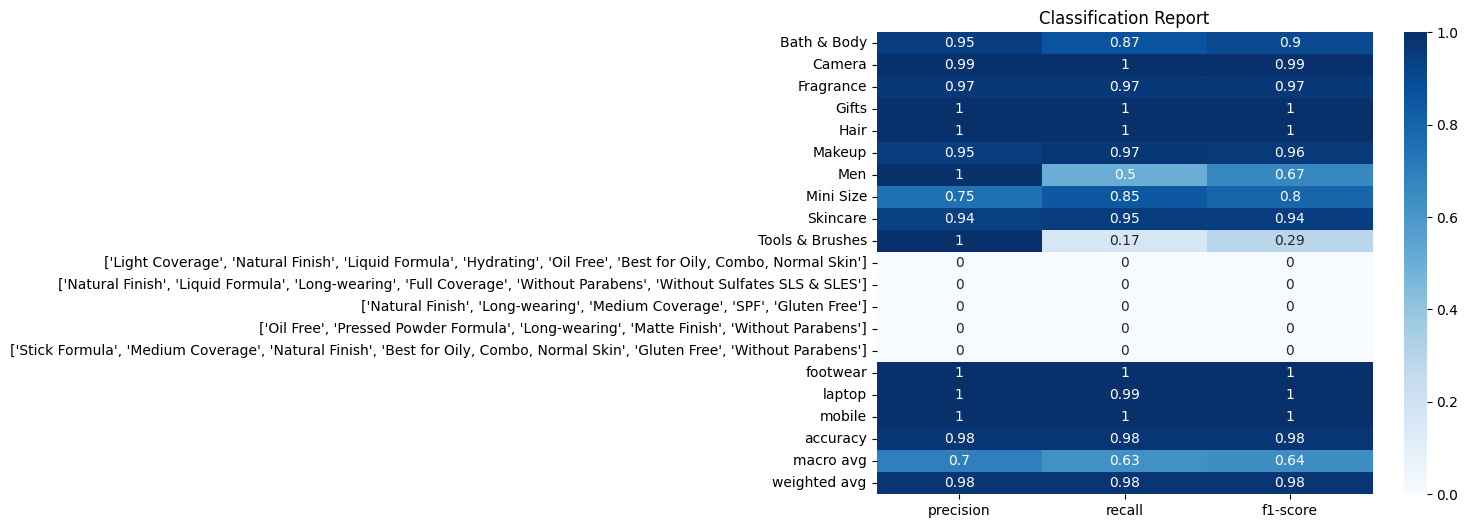

In [ ]:
# Classification Report Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  71    0    3    0    0    2    0    0    6    0    0    0    0    0
     0    0    0    0]
 [   0 1035    0    0    0    3    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   2    0  360    0    0    6    0    4    0    0    0    0    0    0
     0    0    0    1]
 [   0    0    0    4    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0 1199    1    0    0    3    0    0    0    0    0
     0    0    0    0]
 [   0    0    1    0    1 1141    0   19   13    0    0    0    0    0
     0    0    0    0]
 [   0    0    2    0    0    0    9    0    7    0    0    0    0    0
     0    0    0    0]
 [   0    0    5    0    0    7    0   88    4    0    0    0    0    0
     0    0    0    0]
 [   1    0    1    0    0   20    0    6  523    0    0    0    0    0
     0    0    0    0]
 [   1    0    0    0    0   18    0    0    1    4    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    1

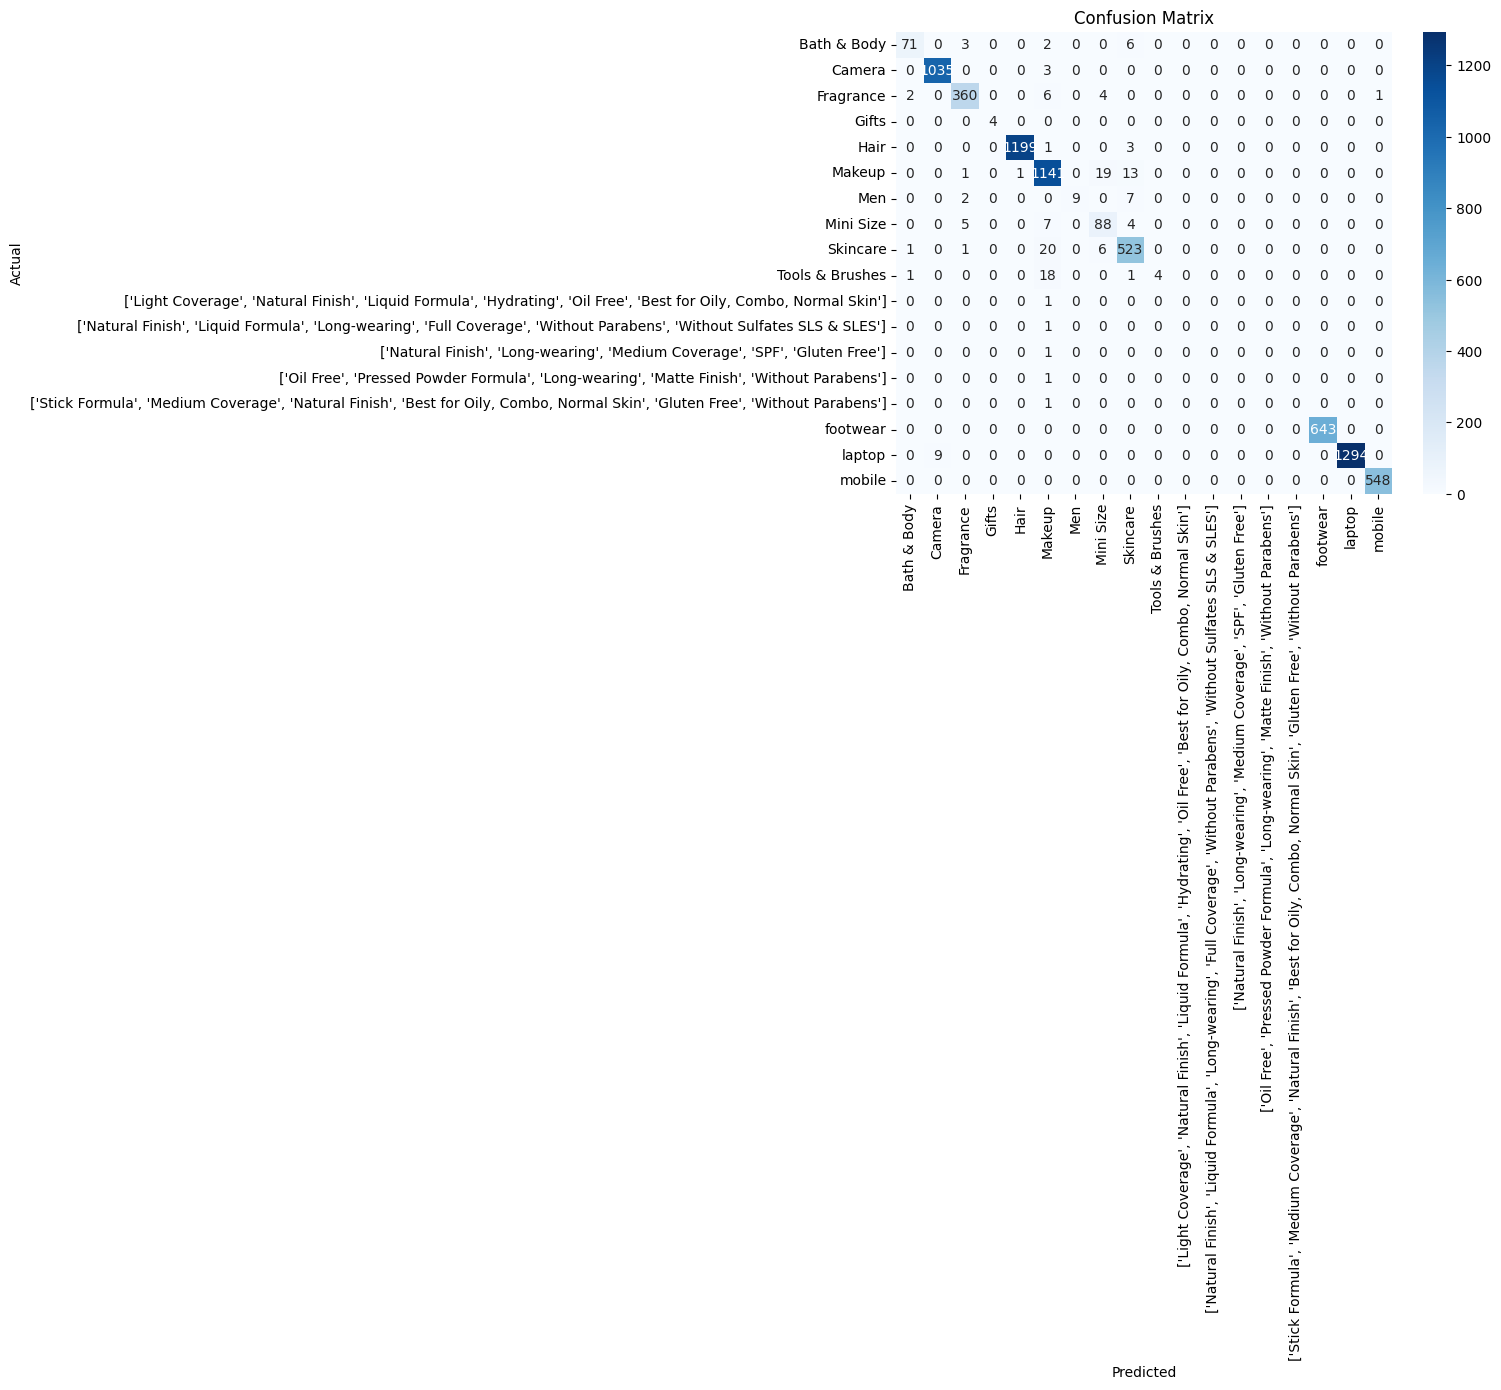

In [18]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()